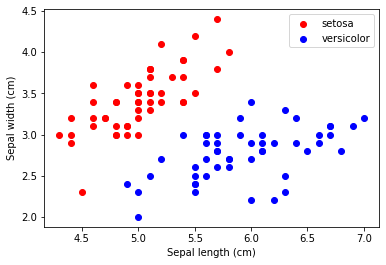

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


In [5]:
from sklearn.datasets import load_iris

iris = load_iris()



import pandas as pd

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target_names[iris.target]


binary_df = df[df['target'] != 'virginica']

import matplotlib.pyplot as plt

plt.scatter(binary_df[binary_df['target']=='setosa']['sepal length (cm)'], binary_df[binary_df['target']=='setosa']['sepal width (cm)'], color='red')
plt.scatter(binary_df[binary_df['target']=='versicolor']['sepal length (cm)'], binary_df[binary_df['target']=='versicolor']['sepal width (cm)'], color='blue')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend(['setosa', 'versicolor'])
plt.show()



from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(binary_df.drop('target', axis=1), binary_df['target'], test_size=0.2, random_state=42)



X_train = X_train.values
X_test = X_test.values
y_train = (y_train == 'versicolor').astype(int)
y_test = (y_test == 'versicolor').astype(int)



from sklearn.linear_model import Perceptron

perceptron = Perceptron(random_state=42)
perceptron.fit(X_train, y_train)



from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = perceptron.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)



import numpy as np

class PerceptronScratch:
    
    def _init_(self, learning_rate=0.1, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features + 1)
        X = np.concatenate([X, np.ones((n_samples, 1))], axis=1)
        for i in range(self.n_iterations):
            for j in range(n_samples):
                y_pred = self.predict_single(X[j])
                error = y[j] - y_pred
                self.weights += self.learning_rate * error * X[j]
        
    def predict_single(self, x):
        return 1 if np.dot(x, self.weights) >= 0 else 0